This includes Exploratory Data Analysis and Feature Engineering

In [1]:
!pip install seaborn --quiet


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("azureml://subscriptions/29ad0b17-1515-4859-aad4-bc6acc7d11ad/resourcegroups/ML_Surgical_Risk_NA_Mkhize/workspaces/Surgical_Risk_WS_NA_Mkhize/datastores/workspaceblobstore/paths/UI/2026-02-02_190451_UTC/diabetes.csv")

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### **EDA**

Here we will explore the data visually to check for any relationships between features and insights we can gain from it.
We will explore the following:

- Numerical features
- Categorical features
- Missing values and 
- Outliers

**1) Numerical features**

a)Temporal variable

Here we can observe that we have a Temporal variable which is 'Age'. Let's check the relationship between Age and the target vector 'Outcome'

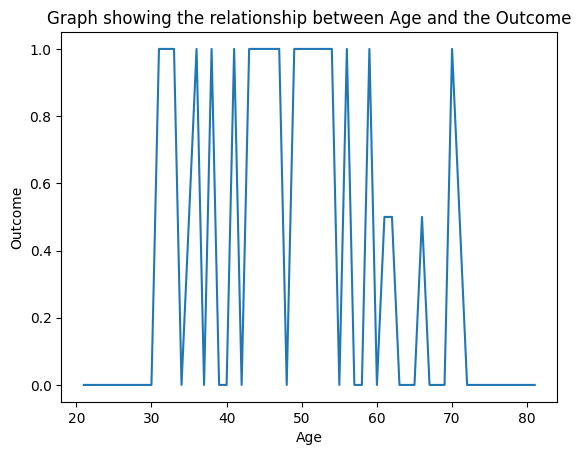

In [4]:
df.groupby("Age")["Outcome"].median().plot()
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.title("Graph showing the relationship between Age and the Outcome")
plt.show()

From the graph we can see that ages just after 20 to 30 years, and ages just after 70 and 80 years, are at low risk of getting diabetes.
Ages +40 to 55 years is the age where people are at high risk of getting diabetes.
This shows a clear relationship between Ages and the Outcome

**b) Discrete Numerical Variables**

We will analyse discrete variables by visualising the relationship using violin plots
- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin


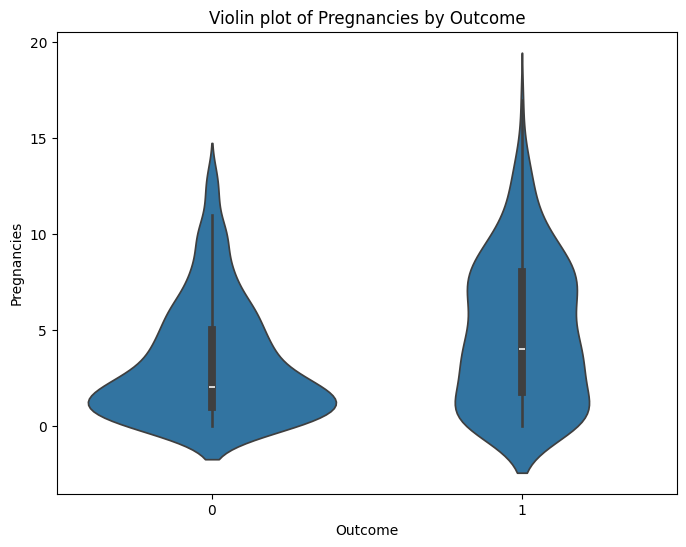

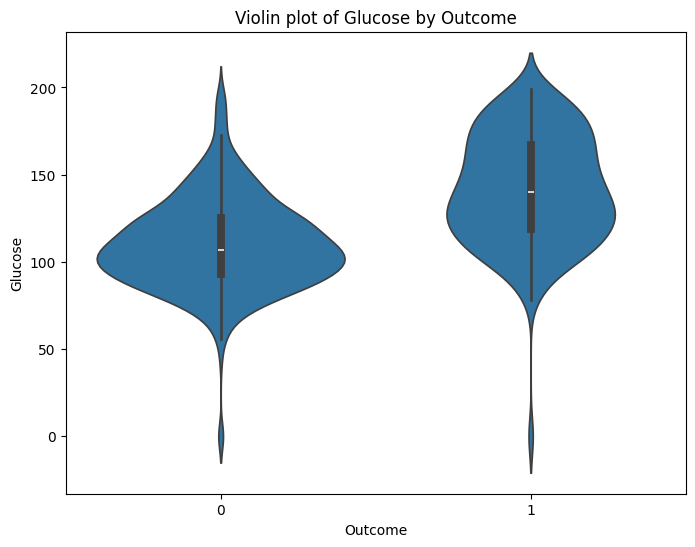

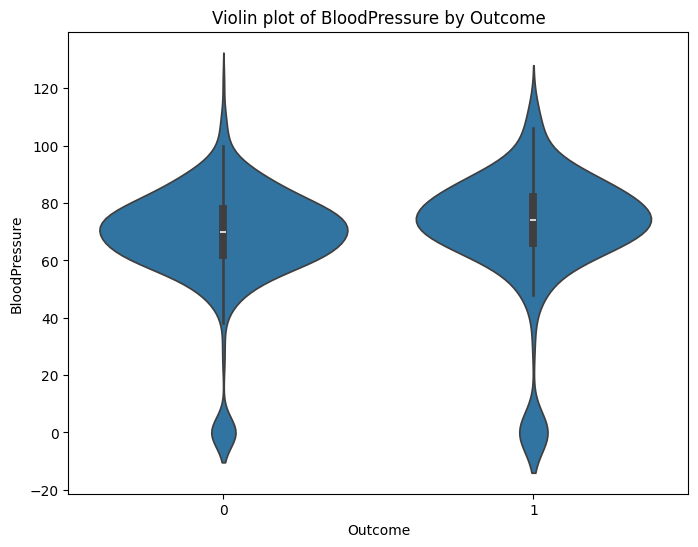

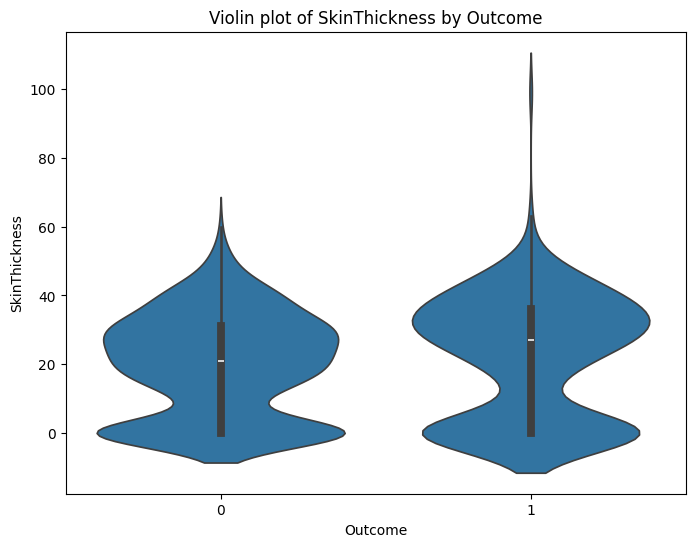

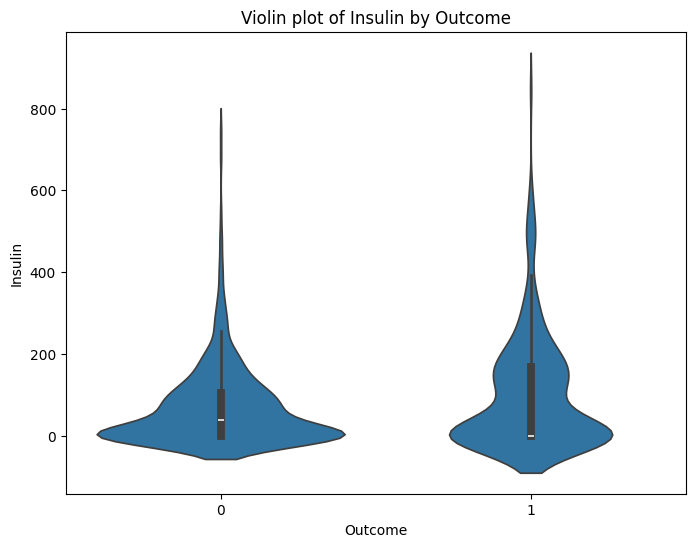

In [5]:
discrete_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

for var in discrete_var:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Outcome', y=var, data=df)
    plt.title(f'Violin plot of {var} by Outcome')
    plt.show()

**Insights**<br>
<u>Pregnancies</u> :<br>
People with 0 to less than 3 pregnancies have low risks of getting diabetes. Those with 3+ pregnancies increase their chances of getting diabetes. This tells us that the more pregnancies you have the higher the risk.

<u>Glucose</u> :<br>
A glucose level around around 100mg have lower chances of being diabetic. The higher the number the greater the chances of being diabetic.

<u>Blood Pressure</u>:<br>
There's a slight difference between the 2 (0 and 1 outcome). It looks like the closer that number gets to 80mm the higher the chances of being diabetes . But this is a slight difference.

<u>Skin Thickness</u>:<br>
This graph also shows a slight difference between the two. However, the thicker the skin the higher the chances of being diabetic.

<u>Insulin</u>:<br>
The relationship here is clear. The higher the insulin levels the higher the chances of being diabetic.

 c) <b>Continuous numberical variables </b>
<br>
-BMI
<br>
-DiabetesPedigreeFunction

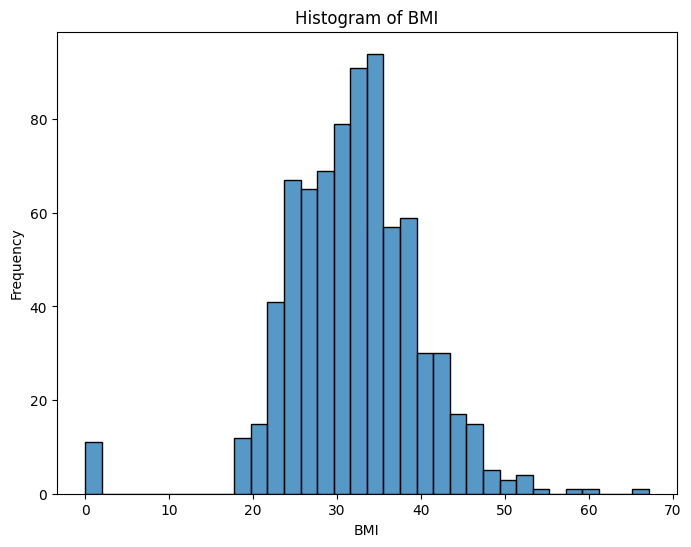

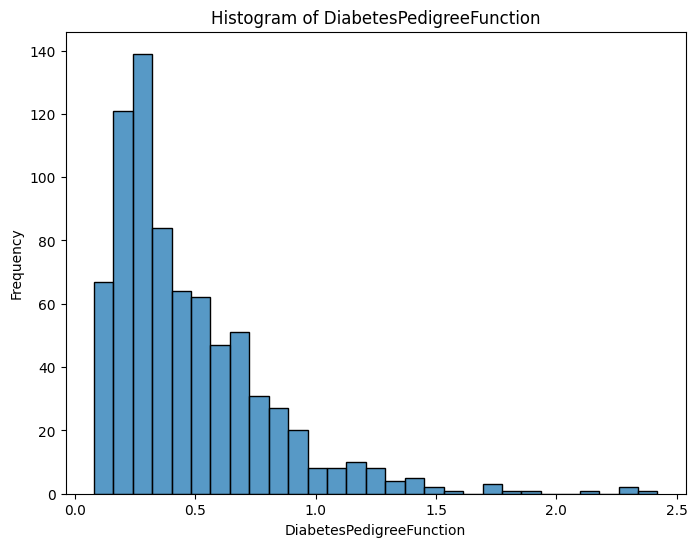

In [6]:
continuous_vars = ['BMI', 'DiabetesPedigreeFunction']

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

<u>BMI</u>:
<br>
It follows a normal distribution and has outliers. 
A normal distribution suggests that the data is evenly distributed around the average value (between 30 - 40)
<br>
<br>
<u>DiabetesPedigreeFunction</u>:
<br>
Skewed to the right. This indicates that there are a few unusually large values in the dataset (values that are closer to 0.0)

2)<b> Categorical features </b>
<br>
There are no categorical features
<br>
<br>
3) <b> Missing values</b>
<br>
There are no missing values
<br>
<br>
4) <b> Outliers</b>
<br>
Lets view outliers in the datasets via boxplots

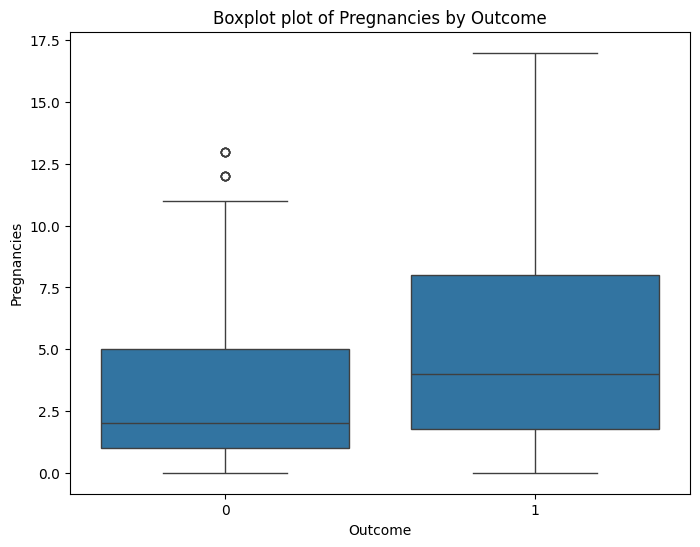

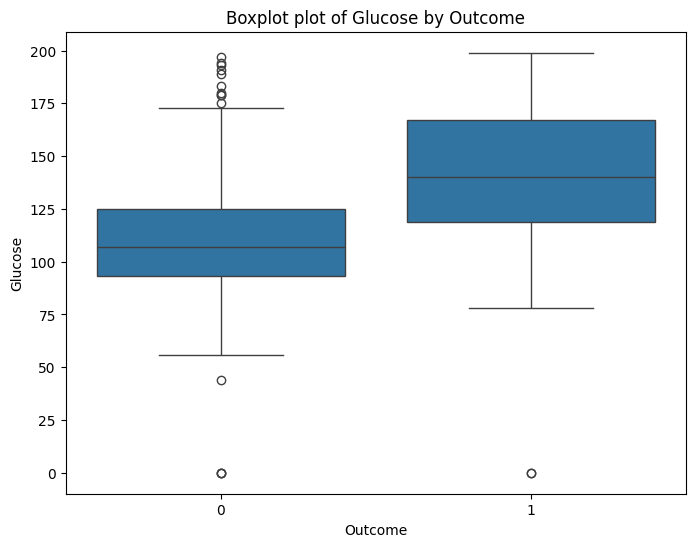

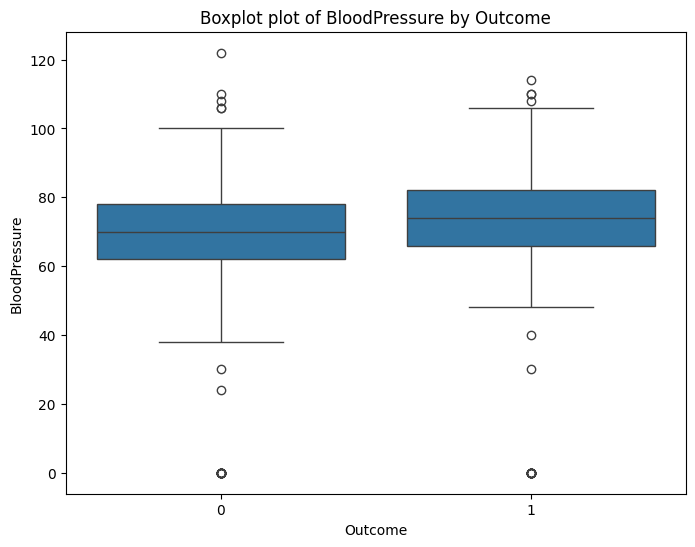

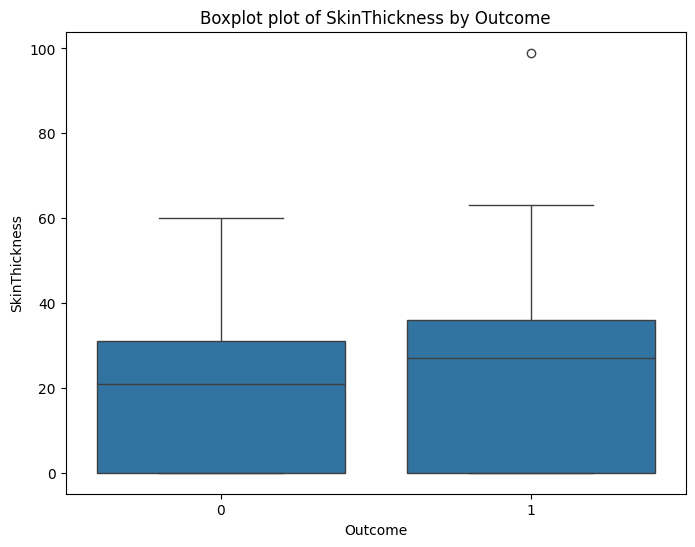

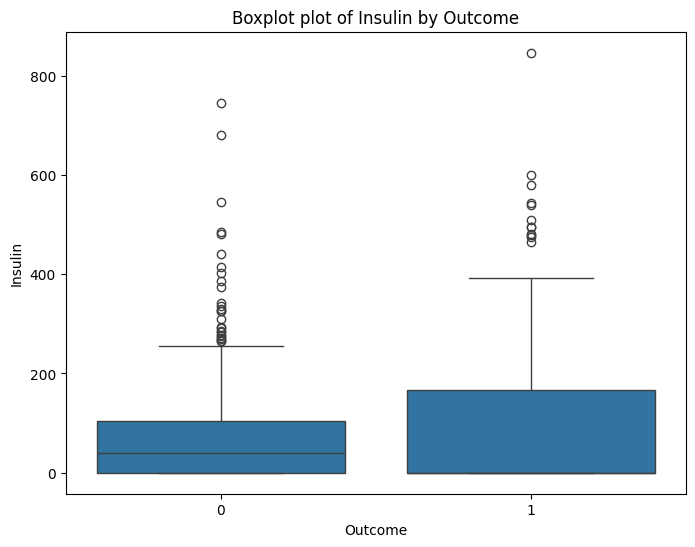

In [7]:
outliers_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction']

for var in discrete_var:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=var, data=df)
    plt.title(f'Boxplot plot of {var} by Outcome')
    plt.show()

These graphs show that there are ouliers in all features and they need to be treated in the Feature Engineering phase , before model building.


### **Feature Engineering**

We now need to treat outliers

In [8]:
def wisker(col):
  q1,q3 = df[col].quantile([0.25,0.75])
  iqr = q3-q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  return upper,lower

In [9]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction']:
  upper,lower = wisker(i)
  df[i] = np.where(df[i]<lower,lower,df[i])
  df[i] = np.where(df[i]>upper,upper,df[i])

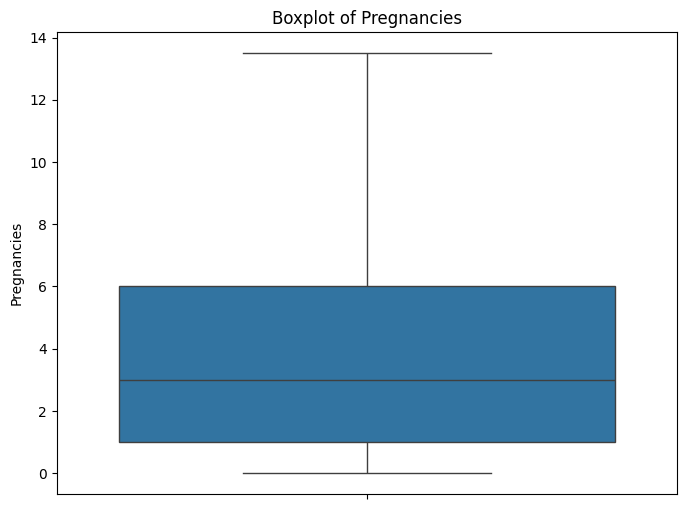

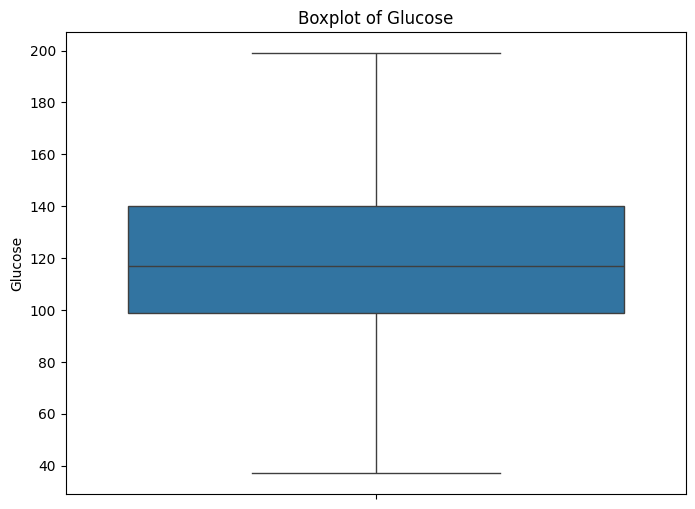

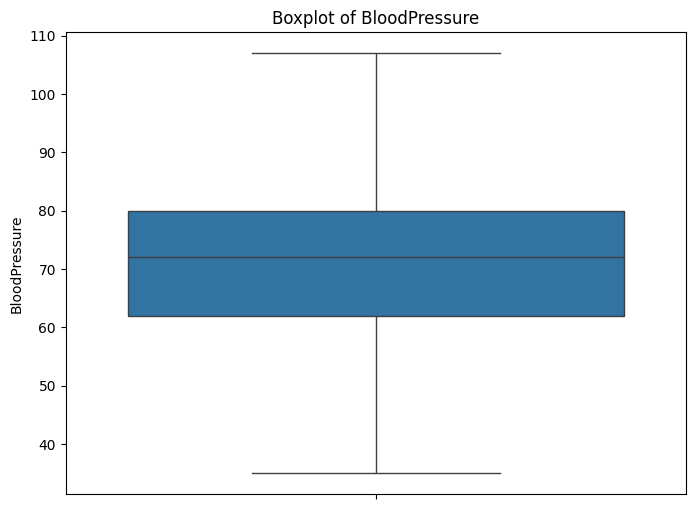

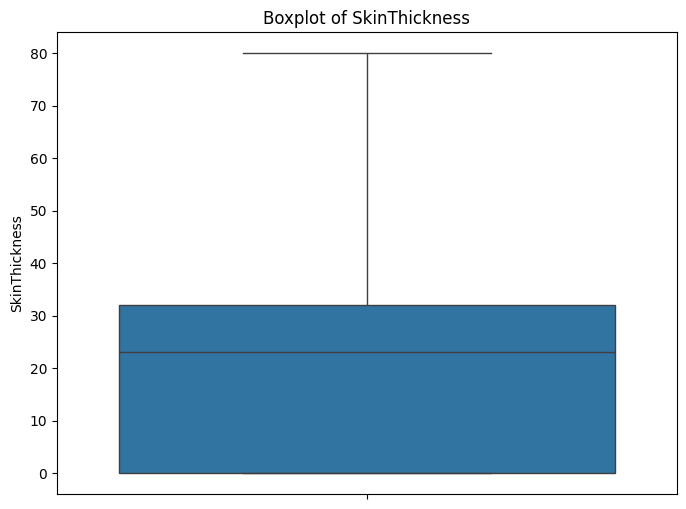

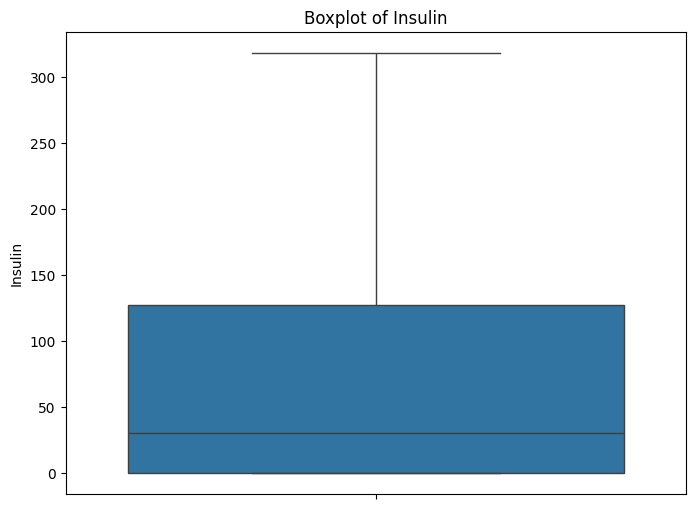

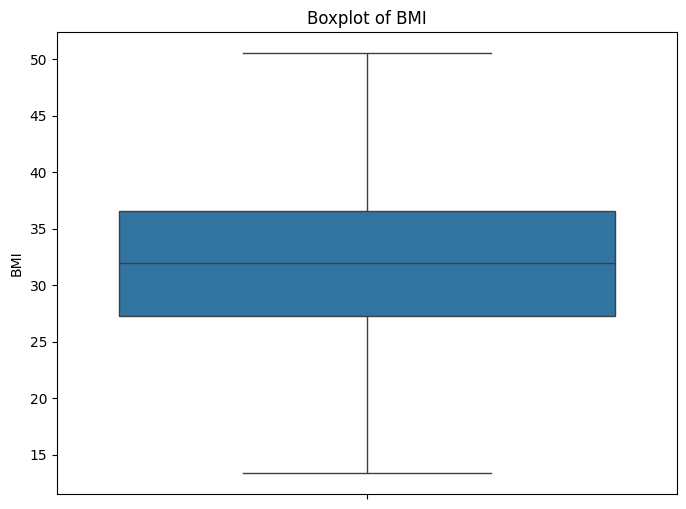

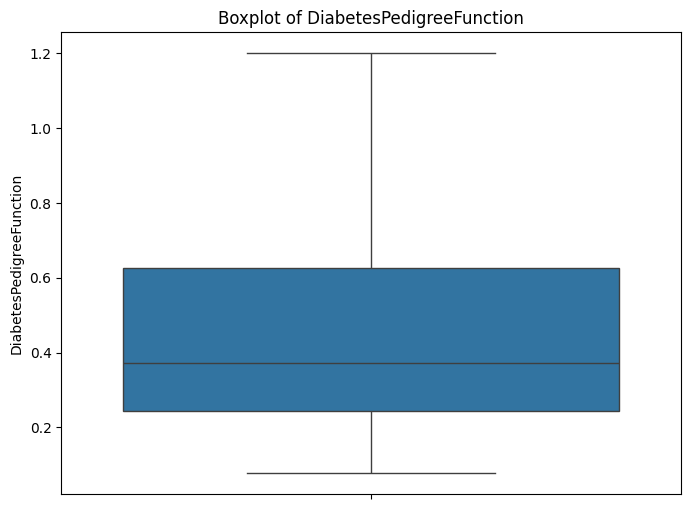

In [10]:
columns_to_plot = [col for col in df.columns if col not in ['Age', 'Outcome']]

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

In [15]:
clean_data = df.head()
print(clean_data)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     1.200   33        1  
